In [100]:
!pip install bnlearn

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import bnlearn as bn

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [110]:
train = pd.read_csv("TrainingData.txt", sep=r'[|\t]+', engine='python') #fixed '|' and remove 't/'
train.columns = train.columns.str.replace('#', '', regex=False).str.strip()

print(train.head())

train_special = pd.read_csv("TrainingSpecialData.txt", sep=r'[|\t]+', engine='python') #fixed '|' and remove 't/'
train_special.columns = train.columns.str.replace('#', '', regex=False).str.strip()

print(train_special.head())

   Play tennis  Outlook  Temperature  Humidity  Wind
0            0        6            1         1     1
1            1        6            8         9     1
2            0        5            1         4     9
3            1        5            9        10     6
4            1       10            6         2     7
   Play tennis  Outlook  Temperature  Humidity  Wind
0            0        6            1         1     1
1            1        6            8         9     1
2            0        5            1         4     9
3            1        5            9        10     6
4            1       10            6         2     7


In [63]:
test = pd.read_csv("TestDataNoLabel.txt", sep=r'[|\t]+', engine='python')
test.columns = ['Play tennis', 'Outlook', 'Temperature', 'Humidity', 'Wind']
print(test.head())

   Play tennis  Outlook  Temperature  Humidity  Wind
0           -1        5            7         7     7
1           -1       10            8         8    10
2           -1        7            6         2     8
3           -1        9            9         4     8
4           -1        6            5         2     9


In [8]:
train.describe() #compute different characteristics

,Play tennis,Outlook,Temperature,Humidity,Wind
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,0.664857,5.488286,5.525571,5.484000,5.492286
std,0.472074,2.861449,2.883642,2.870053,2.872775
min,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,3.000000,3.000000,3.000000,3.000000
50%,1.000000,6.000000,6.000000,5.000000,5.000000
75%,1.000000,8.000000,8.000000,8.000000,8.000000
max,1.000000,10.000000,10.000000,10.000000,10.000000


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Play tennis  7000 non-null   int64
 1   Outlook      7000 non-null   int64
 2   Temperature  7000 non-null   int64
 3   Humidity     7000 non-null   int64
 4   Wind         7000 non-null   int64
dtypes: int64(5)
memory usage: 273.6 KB


In [71]:
train_special.describe()

,Play tennis,Outlook,Temperature,Humidity,Wind
count,99.000000,99.000000,99.000000,99.000000,99.000000
mean,0.676768,5.111111,5.363636,5.666667,5.757576
std,0.470091,2.885180,2.922309,2.896162,2.725881
min,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,2.500000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,6.000000,6.000000,6.000000
75%,1.000000,7.000000,8.000000,8.000000,8.000000
max,1.000000,10.000000,10.000000,10.000000,10.000000


In [72]:
train_special.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Play tennis  99 non-null     int64
 1   Outlook      99 non-null     int64
 2   Temperature  99 non-null     int64
 3   Humidity     99 non-null     int64
 4   Wind         99 non-null     int64
dtypes: int64(5)
memory usage: 4.0 KB


In [64]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Play tennis  2999 non-null   int64
 1   Outlook      2999 non-null   int64
 2   Temperature  2999 non-null   int64
 3   Humidity     2999 non-null   int64
 4   Wind         2999 non-null   int64
dtypes: int64(5)
memory usage: 117.3 KB


In [65]:
dfhot_train, dfnum_train = bn.df2onehot(train)
dfhot_test, dfnum_test = bn.df2onehot(test)


[df2onehot] >Auto detecting dtypes.


100%|██████████| 5/5 [00:00<00:00, 26.30it/s]


[df2onehot] >Set dtypes in dataframe..


[df2onehot]: 100%|██████████| 5/5 [00:00<00:00, 62.85it/s]


[df2onehot] >Total onehot features: 42

[df2onehot] >Auto detecting dtypes.


100%|██████████| 5/5 [00:00<00:00, 48.83it/s]


[df2onehot] >Set dtypes in dataframe..


[df2onehot]: 100%|██████████| 5/5 [00:00<00:00, 84.32it/s]


[df2onehot] >Total onehot features: 41


In [11]:
dfnum_train #Network dataframe

,Play tennis,Outlook,Temperature,Humidity,Wind
0,0,7,1,1,1
1,1,7,9,10,1
2,0,6,1,5,10
3,1,6,10,2,7
4,1,2,7,3,8
...,...,...,...,...,...
6995,0,4,10,6,3
6996,0,1,6,1,10
6997,0,10,4,6,1
6998,0,7,4,5,3


In [111]:
dfhot_train_special, dfnum_train_special = bn.df2onehot(train_special)


[df2onehot] >Auto detecting dtypes.


100%|██████████| 5/5 [00:00<00:00, 88.54it/s]


[df2onehot] >Set dtypes in dataframe..


[df2onehot]: 100%|██████████| 5/5 [00:00<00:00, 92.23it/s]

[df2onehot] >Total onehot features: 22


In [112]:
dfnum_train_special

,Play tennis,Outlook,Temperature,Humidity,Wind
0,0,5,1,0,0
1,1,5,4,5,0
2,0,4,1,3,0
3,1,4,5,1,4
4,1,1,3,0,5
...,...,...,...,...,...
94,0,0,1,0,0
95,1,5,5,5,3
96,1,5,4,0,3
97,1,0,3,0,3


In [118]:
print(dfnum_train_special.columns.tolist())

['Outlook', 'Temperature', 'Humidity', 'Wind']


In [121]:
dfnum_target_special = train_special['Play tennis']
print(dfnum_target_special)

0     0
1     1
2     0
3     1
4     1
     ..
94    0
95    1
96    1
97    1
98    1
Name: Play tennis, Length: 99, dtype: int64


In [122]:
dfnum_target = train['Play tennis']

In [93]:
print(dfnum_train_special.columns.tolist())

['Outlook', 'Temperature', 'Humidity', 'Wind']


In [123]:
Xtrain_special, Xval_special, Ztrain_special, Zval_special = train_test_split(dfnum_train_special, dfnum_target_special, test_size = 0.2, random_state = 0) #split test
#Xtrain: 80% features for training, Xval: 20% features eval
#Ztrain: 80% labels for tarining, Zval: 20% labels for eval
valid_special = pd.concat([Xval_special, Zval_special], axis = 'columns')
dfnum_special = pd.concat([Xtrain_special, Ztrain_special], axis = 'columns')
dfnum_special

,Outlook,Temperature,Humidity,Wind,Play tennis
43,3,0,2,5,1
62,2,1,3,2,0
3,4,5,1,4,1
71,0,0,1,0,1
45,0,2,0,4,0
...,...,...,...,...,...
95,5,5,5,3,1
67,0,0,5,3,1
64,2,0,0,2,0
47,0,1,3,0,0


In [124]:
Xtrain, Xval, Ztrain, Zval = train_test_split(dfnum_train, dfnum_target, test_size = 0.2, random_state = 0) #split test
#Xtrain: 80% features for training, Xval: 20% features eval
#Ztrain: 80% labels for tarining, Zval: 20% labels for eval
valid = pd.concat([Xval, Zval], axis = 'columns')
dfnum = pd.concat([Xtrain, Ztrain], axis = 'columns')
dfnum

,Outlook,Temperature,Humidity,Wind,Play tennis
6137,8,4,10,10,1
4778,1,7,5,4,0
3149,1,6,9,9,1
4638,2,4,2,5,1
4110,4,5,7,5,0
...,...,...,...,...,...
4931,5,9,7,7,1
3264,3,4,6,5,0
1653,1,6,9,6,0
2607,7,2,5,2,1


In [24]:
def get_acc(model, df, col):
    pred = bn.predict(model, df, variables=[col]) #df is eval dataset, #col is target col
    print(pred)
    acc = accuracy_score(df[col],pred[col])
    print('Accuracy-', acc)
    return acc

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


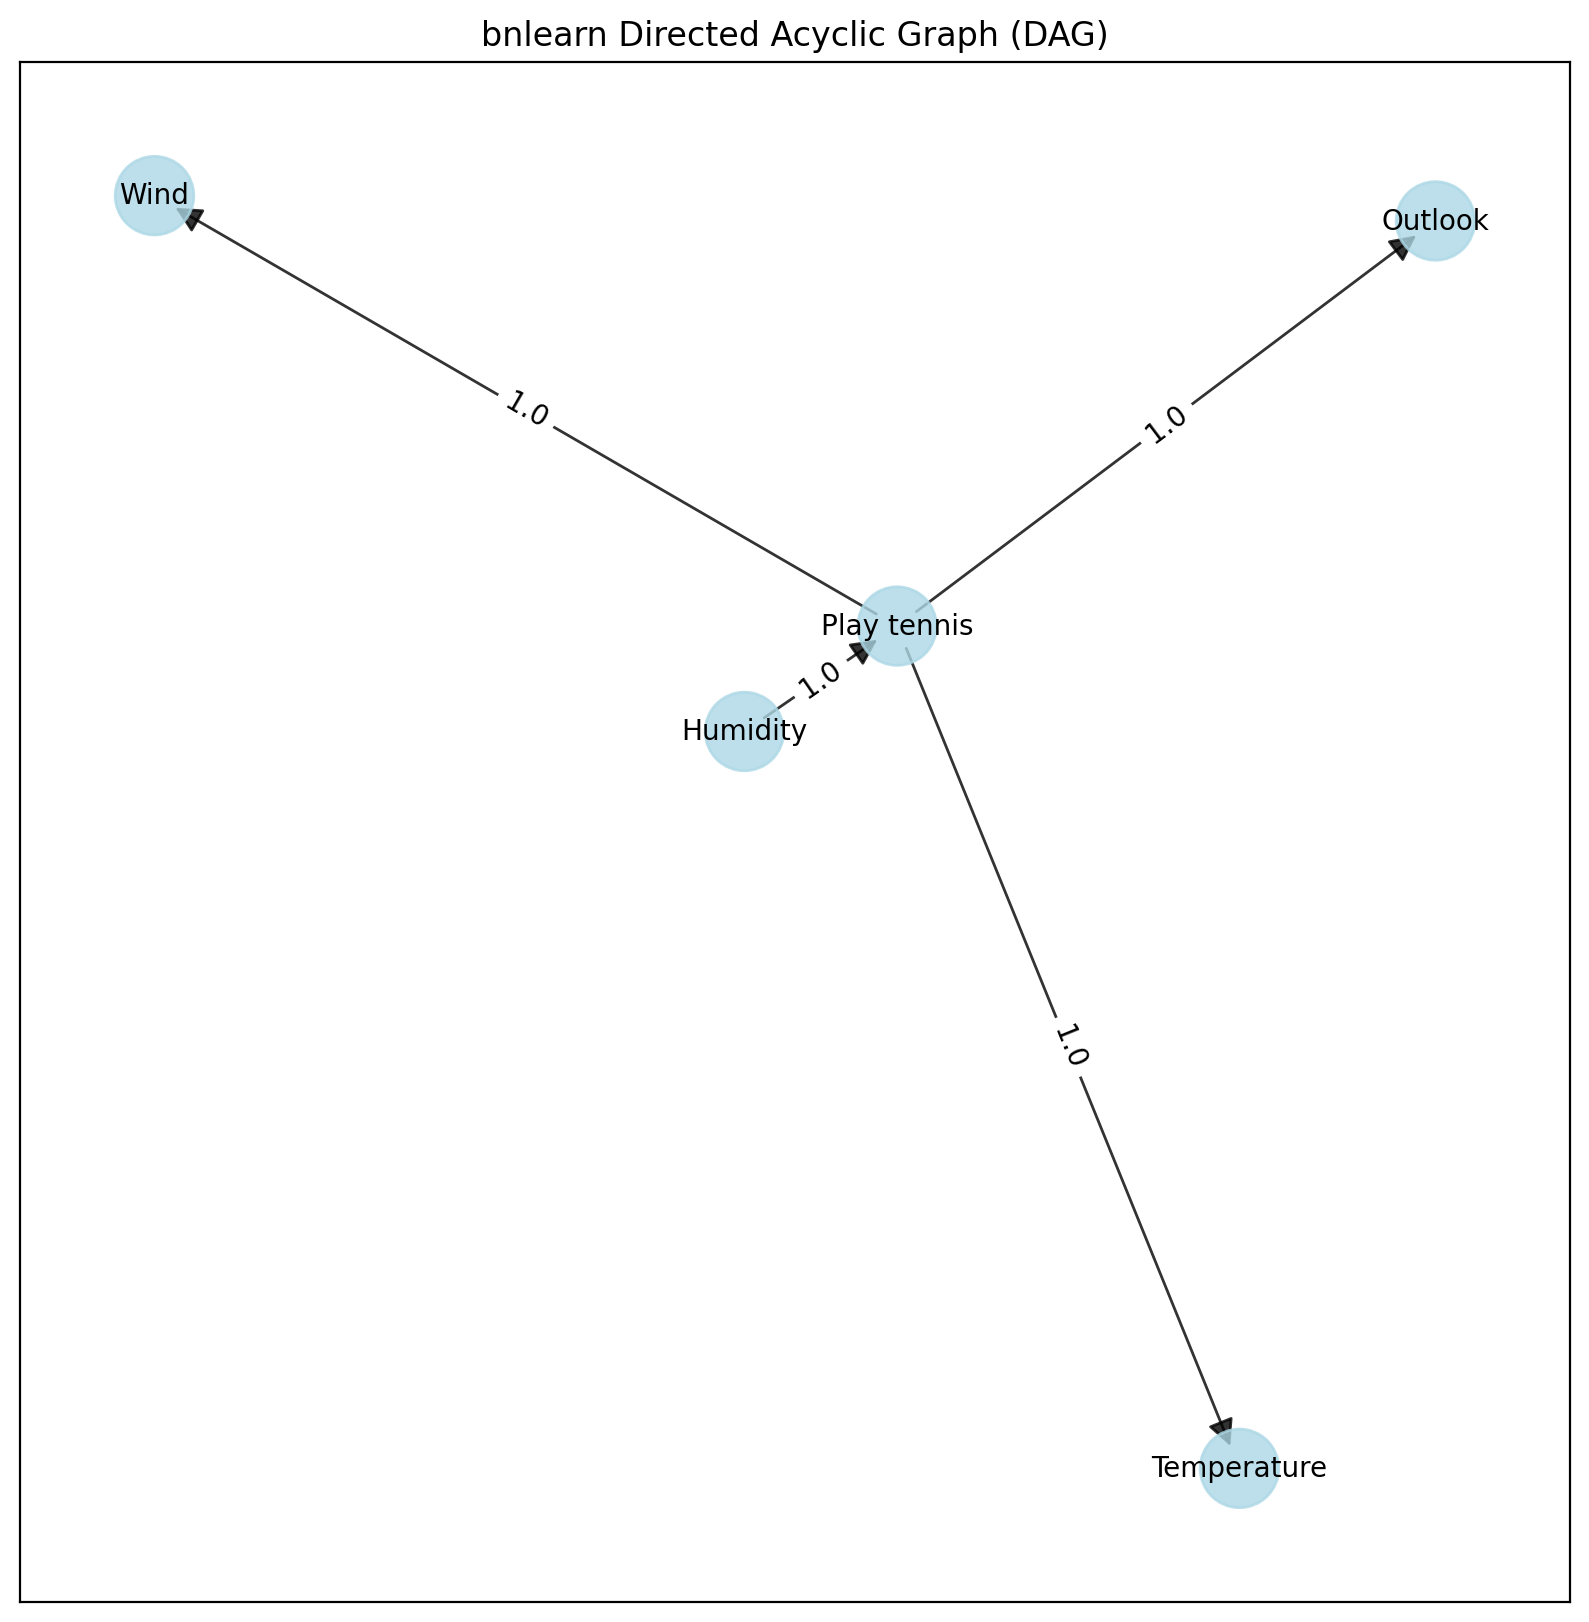

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Humidity:
+--------------+-----------+
| Humidity(1)  | 0.104242  |
+--------------+-----------+
| Humidity(2)  | 0.0954545 |
+--------------+-----------+
| Humidity(3)  | 0.0969697 |
+--------------+-----------+
| Humidity(4)  | 0.0995455 |
+--------------+-----------+
| Humidity(5)  | 0.104394  |
+--------------+-----------+
| Humidity(6)  | 0.100152  |
+--------------+-----------+
| Humidity(7)  | 0.100909  |
+--------------+-----------+
| Humidity(8)  | 0.100455  |
+--------------+-----------+
| Humidity(9)  | 0.0990909 |
+--------------+-----------+
| Humidity(10) | 0.0987879 |
+--------------+-----------+
[bnlearn] >CPD of Play tennis:
+----------------+-----+--------------------+
| Humidity       | ... | Humidity(10)       |
+----------------+-----+--------------------+


In [51]:
%%time

DAG = bn.structure_learning.fit(dfnum, methodtype='hc', root_node='Play tennis', bw_list_method='nodes', verbose=3)

G = bn.plot(DAG)

model = bn.parameter_learning.fit(DAG, dfnum, verbose=3);

In [17]:
model

{'model': <pgmpy.models.BayesianNetwork.BayesianNetwork at 0x1e948622510>,
 'adjmat': target       Outlook  Temperature  Humidity   Wind  Play tennis
 source                                                         
 Outlook        False        False     False  False        False
 Temperature    False        False     False  False        False
 Humidity       False        False     False  False         True
 Wind           False        False     False  False        False
 Play tennis     True         True     False   True        False,
 'config': {'verbose': 3, 'method': 'bayes', 'n_jobs': -1},
 'model_edges': [('Humidity', 'Play tennis'),
  ('Play tennis', 'Outlook'),
  ('Play tennis', 'Temperature'),
  ('Play tennis', 'Wind')],
 'structure_scores': {'k2': np.float64(-53565.26863284929),
  'bic': np.float64(-53660.90929698628),
  'bdeu': np.float64(-53587.588140716274),
  'bds': np.float64(-53597.29220124411)},
 'independence_test': None}

In [25]:
acc1 = get_acc(model, valid, 'Play tennis')

[bnlearn]> Remaining columns for inference: 4


100%|██████████| 1400/1400 [00:01<00:00, 1294.95it/s]

      Play tennis         p
0               0  0.839612
1               0  0.877996
2               1  0.906758
3               1  0.951592
4               0  0.868051
...           ...       ...
1395            0  0.956604
1396            1  0.529931
1397            1  0.661737
1398            1  0.503438
1399            1  0.901467

[1400 rows x 2 columns]
Accuracy- 0.9471428571428572


[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


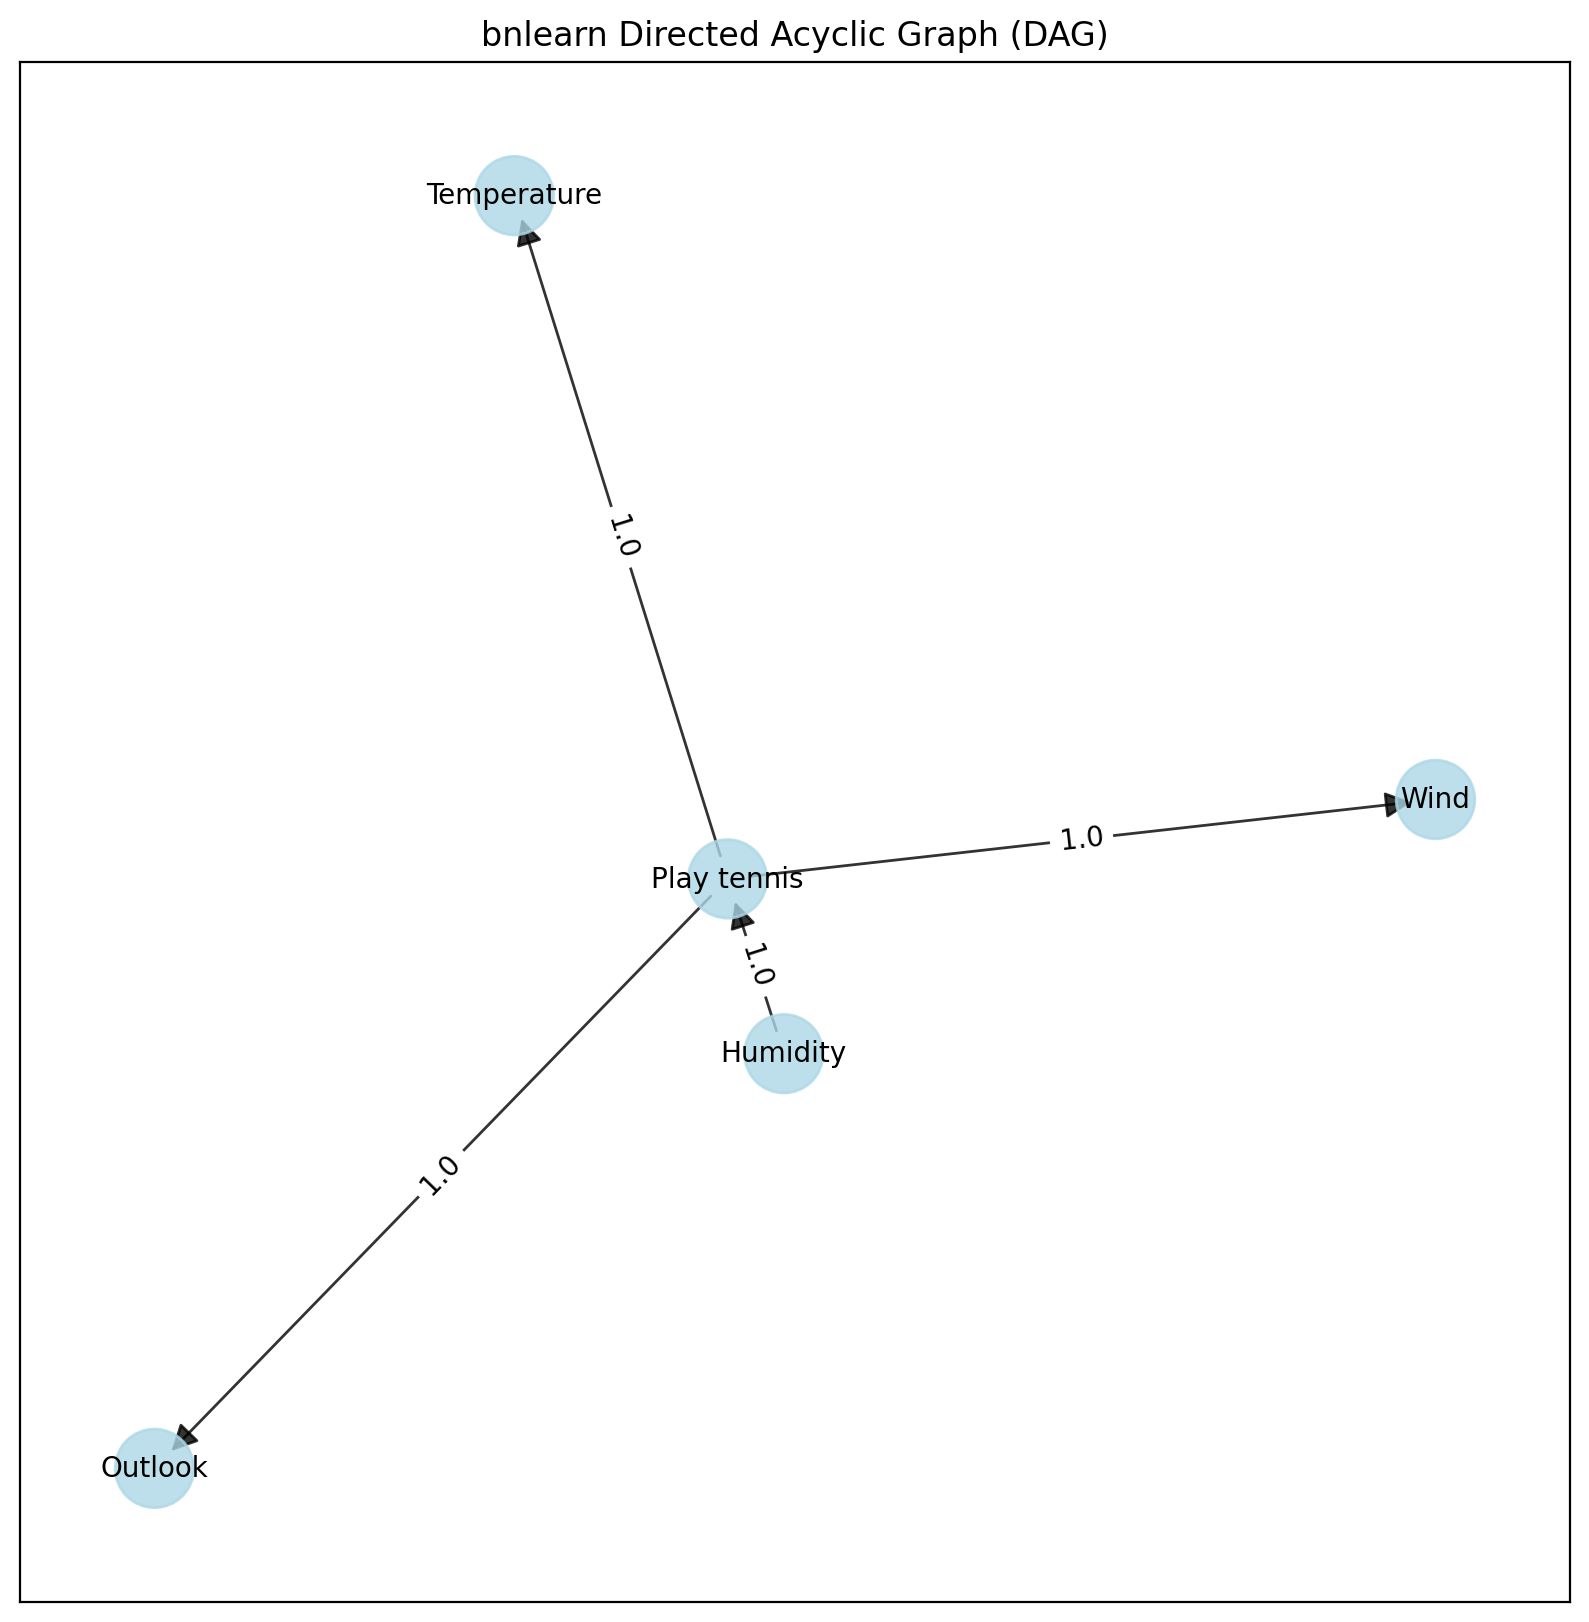

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Humidity:
+--------------+-----------+
| Humidity(1)  | 0.104242  |
+--------------+-----------+
| Humidity(2)  | 0.0954545 |
+--------------+-----------+
| Humidity(3)  | 0.0969697 |
+--------------+-----------+
| Humidity(4)  | 0.0995455 |
+--------------+-----------+
| Humidity(5)  | 0.104394  |
+--------------+-----------+
| Humidity(6)  | 0.100152  |
+--------------+-----------+
| Humidity(7)  | 0.100909  |
+--------------+-----------+
| Humidity(8)  | 0.100455  |
+--------------+-----------+
| Humidity(9)  | 0.0990909 |
+--------------+-----------+
| Humidity(10) | 0.0987879 |
+--------------+-----------+
[bnlearn] >CPD of Play tennis:
+----------------+-----+--------------------+
| Humidity       | ... | Humidity(10)       |
+----------------+-----+--------------------+


In [41]:
%%time

DAG2 = bn.structure_learning.fit(dfnum, methodtype='hc', root_node='Play tennis', bw_list_method='nodes', verbose=4)

G2 = bn.plot(DAG2)

model2 = bn.parameter_learning.fit(DAG2, dfnum, verbose=4);

In [126]:
acc2 = get_acc(model2, valid, 'Play tennis')

[bnlearn]> Remaining columns for inference: 4


100%|██████████| 1400/1400 [00:02<00:00, 654.11it/s]


      Play tennis         p
0               0  0.839612
1               0  0.877996
2               1  0.906758
3               1  0.951592
4               0  0.868051
...           ...       ...
1395            0  0.956604
1396            1  0.529931
1397            1  0.661737
1398            1  0.503438
1399            1  0.901467

[1400 rows x 2 columns]
Accuracy- 0.9471428571428572


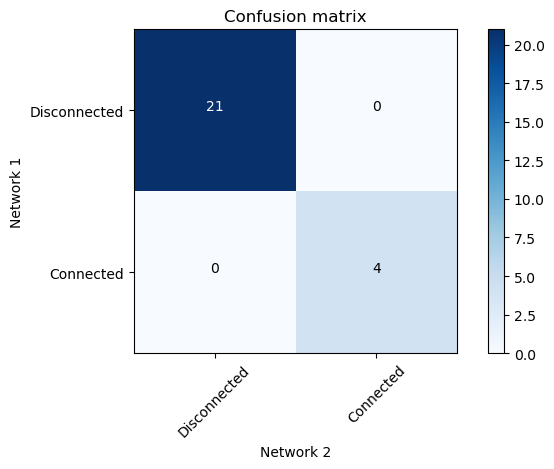

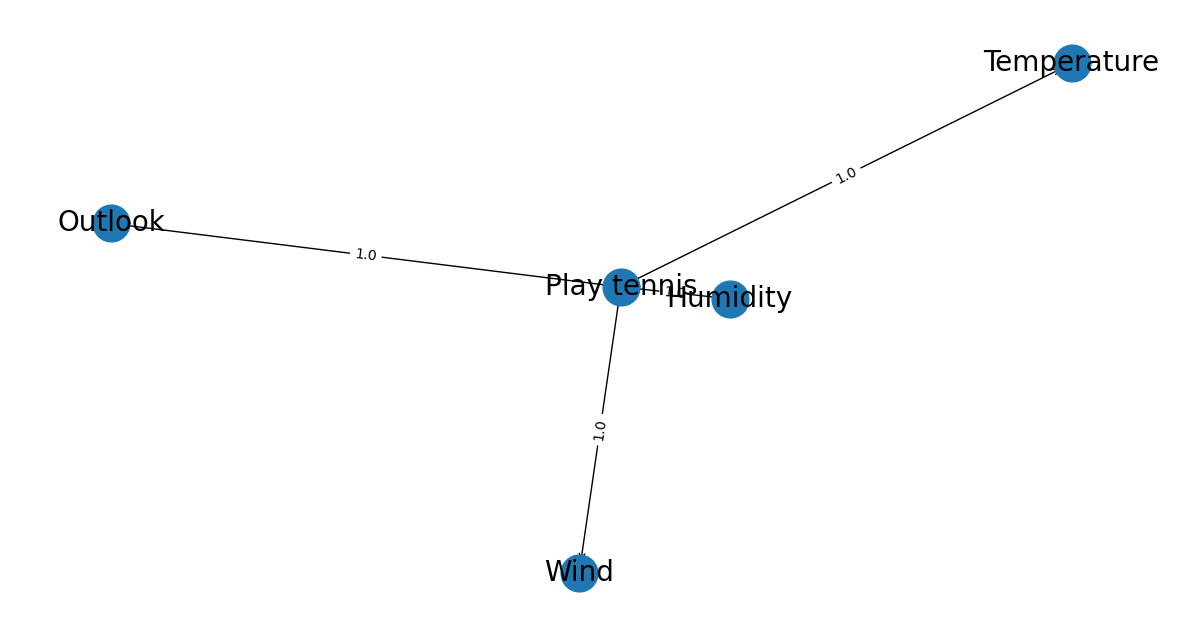

Coincidence - 1.0


In [33]:
#Comparing models
res = bn.bnlearn.compare_networks(model, model2, figsize=(15, 8), verbose=3)
print('Coincidence -', (res[0][0, 0] + res[0][1, 1])/res[0].sum())

In [89]:
%%time

DAG_special = bn.structure_learning.fit(dfnum_special, methodtype='hc', root_node='Play tennis', bw_list_method='nodes', verbose=3)

G_special = bn.plot(DAG_special)

model_special = bn.parameter_learning.fit(DAG_special, dfnum_special, verbose=3);

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn]> Nothing to plot because no edges are present between nodes. 
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >Compute structure scores for model comparison (higher is better).
CPU times: total: 78.1 ms
Wall time: 91.9 ms


In [125]:
acc_special = get_acc(model_special, valid_special, 'Play tennis')

[bnlearn]> Remaining columns for inference: 4


  0%|          | 0/20 [00:00<?, ?it/s]


ValueError: Node Outlook not in not in graph

In [86]:
train_special.head()

,Play tennis,Outlook,Temperature,Humidity,Wind
0,0,6,1,1,1
1,1,6,8,9,1
2,0,5,1,4,9
3,1,5,9,10,6
4,1,10,6,2,7


In [37]:
print(model['adjmat'].columns)

Index(['Outlook', 'Temperature', 'Humidity', 'Wind', 'Play tennis'], dtype='object', name='target')


In [48]:
# Make inference
query = bn.inference.fit(model, variables=['Play tennis'], evidence={'Humidity':True, 'Outlook':True})
print(query)
print(query.df)

q1 = bn.inference.fit(model, variables=['Play tennis'], evidence={'Humidity':1})
print(q1)
print(q1.df)


# Print model
bn.print_CPD(model)

[bnlearn] >Variable Elimination.
+----+---------------+----------+
|    |   Play tennis |        p |
+====+===============+==========+
|  0 |             0 | 0.842971 |
+----+---------------+----------+
|  1 |             1 | 0.157029 |
+----+---------------+----------+

Summary for variables: ['Play tennis']
Given evidence: Humidity=True, Outlook=True

Play tennis outcomes:
- Play tennis: 0 (84.3%)
- Play tennis: 1 (15.7%)
+----------------+--------------------+
| Play tennis    |   phi(Play tennis) |
+================+====================+
| Play tennis(0) |             0.8430 |
+----------------+--------------------+
| Play tennis(1) |             0.1570 |
+----------------+--------------------+
   Play tennis         p
0            0  0.842971
1            1  0.157029
[bnlearn] >Variable Elimination.
+----+---------------+----------+
|    |   Play tennis |        p |
+====+===============+==========+
|  0 |             0 | 0.640988 |
+----+---------------+----------+
|  1 |        

{'Humidity':    Humidity         p
 0         1  0.104242
 1         2  0.095455
 2         3  0.096970
 3         4  0.099545
 4         5  0.104394
 5         6  0.100152
 6         7  0.100909
 7         8  0.100455
 8         9  0.099091
 9        10  0.098788,
 'Play tennis':     Play tennis  Humidity         p
 0             0         1  0.640988
 1             0         2  0.147619
 2             0         3  0.567187
 3             0         4  0.487062
 4             0         5  0.429608
 5             0         6  0.361573
 6             0         7  0.316817
 7             0         8  0.256410
 8             0         9  0.220183
 9             0        10  0.179448
 10            1         1  0.359012
 11            1         2  0.852381
 12            1         3  0.432812
 13            1         4  0.512938
 14            1         5  0.570392
 15            1         6  0.638427
 16            1         7  0.683183
 17            1         8  0.743590
 18            1

In [68]:
# Create feature-only test DataFrame
dfnum_test_features = dfnum_test.drop(columns=['Play tennis'])

# Run prediction
Pout = bn.predict(model, df=dfnum_test_features, variables=['Play tennis'])

# Check output
print(Pout['Play tennis'])

Pout['Play tennis'].to_csv('submission.txt', index=False, header=False)

[bnlearn]> Remaining columns for inference: 4


100%|██████████| 2999/2999 [00:04<00:00, 634.52it/s]

0       1
1       1
2       1
3       1
4       1
       ..
2994    0
2995    1
2996    1
2997    1
2998    1
Name: Play tennis, Length: 2999, dtype: int64
